## Generate Random Phase I.C.

0.9939343277543241


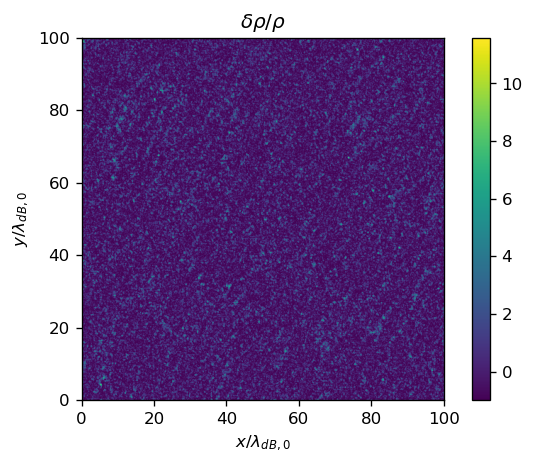

In [51]:
from RandomPhaseGenerator import RandomPhase
import numpy as np
import matplotlib.pyplot as plt

resolution = 512
number_modes = int(resolution/1.5)
debroglie_length = 1. 
box_size = 100

psi0, rho0 = RandomPhase(resolution, number_modes,  debroglie_length, box_size)

# Normalize
Sum = np.sum(rho0)
psi0 /= np.sqrt(Sum)
rho0 /= Sum
delta = rho0/np.average(rho0) - 1

print(np.std(rho0)/np.average(rho0))

#Plot

plt.figure(dpi=120)
plt.title(r"$\delta\rho/\rho$")
plt.imshow(delta, extent=[0, box_size/debroglie_length, 0, box_size/debroglie_length])
plt.xlabel(r"$x/\lambda_{dB,0}$")
plt.ylabel(r"$y/\lambda_{dB,0}$")
plt.rcParams['axes.facecolor']='white'
plt.colorbar()
plt.show()

In [55]:
np.savetxt("Simulation Runs\\rho0_N"+str(resolution)+".csv", rho0, delimiter="," )

## Evolve forward in time

In [52]:
from SchroPoissonSolver import fdmSimulation, Center

g_SI = 0

T  = 0.3# time at which simulation ends
dt = 0.0001  # timestep

psi, delta, theta_field = fdmSimulation(rho0 , g_SI, T, dt)

In [155]:
start_time = 1300# pick time to save from, excluding previous times

# np.save("Simulation Runs\psi_sim_N"+str(resolution)+"_g"+str(g_SI)+".npy", psi[start_time:,:,:] )
# np.save("Simulation Runs\delta_sim_N"+str(resolution)+"_g"+str(g_SI)+".npy", delta[start_time:] )
# np.save("Simulation Runs\phase_sim_N"+str(resolution)+"_g"+str(g_SI)+".npy", theta_field[start_time:,:,:] )

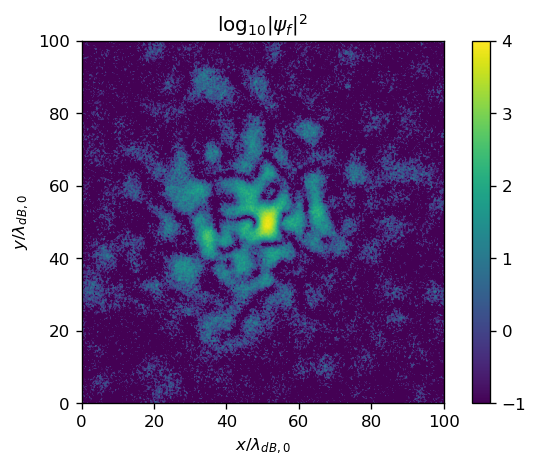

In [53]:
N = np.shape(psi)[1]
halfway = int(N/2)
psi_centered = Center(psi[-1,:,:])
rho_centered = np.abs(psi_centered[:,:])**2
plt.figure(dpi=120)
plt.title(r"$\log_{10}|\psi_f|^2$")
plt.imshow(np.log10(rho_centered), extent=[0, box_size/debroglie_length, 0, box_size/debroglie_length])#, cmap = "inferno")
# plt.plot(halfway, halfway, marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red", zorder=1)
plt.colorbar()
plt.clim(-1, 4)
plt.rcParams['axes.facecolor']='white'
plt.xlabel(r"$x/\lambda_{dB,0}$")
plt.ylabel(r"$y/\lambda_{dB,0}$")
plt.show()

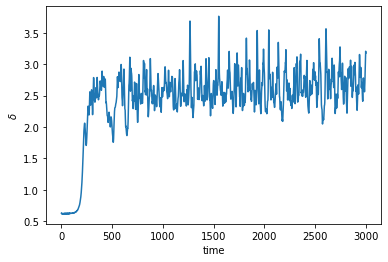

In [54]:
plt.figure()
plt.plot(delta)
plt.ylabel(r"$\delta$")
plt.xlabel("time")
plt.show()

## Compute the power spectrum over time

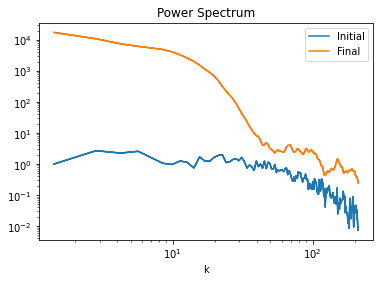

In [47]:
from PowerSpectrum import PowerSpectrum

k_modes, PS0 = PowerSpectrum(rho0)
k_modes, PSf = PowerSpectrum(np.abs(psi[-1,:,:])**2)

plt.figure()
plt.title("Power Spectrum")
plt.loglog(k_modes, PS0/PS0[0], label= "Initial")
plt.loglog(k_modes, PSf/PS0[0], label = "Final")
plt.xlabel("k")
plt.legend()
plt.show()

In [49]:
tshape = np.shape(psi)[0]
# start = start_time
start = 950
spectra = np.zeros((tshape-start , N-1))

for i in range(tshape-start):
    k_modes, spectra[i, :] = PowerSpectrum(np.abs(psi[i+start,:,:])**2)
    
avg_spectrum = np.average(spectra, axis=0)
std = np.std(spectra, axis=0)

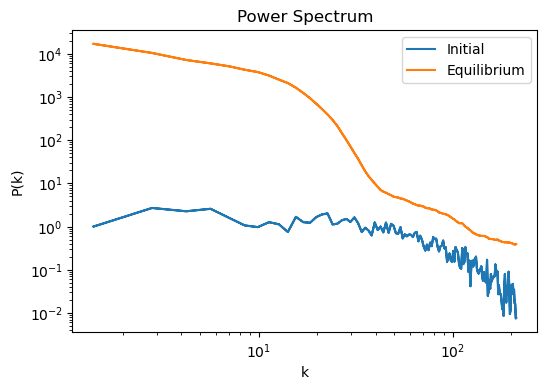

In [50]:
# print(std)
plt.figure(dpi=100)
plt.title("Power Spectrum")
plt.loglog(k_modes, PS0/PS0[0], label= "Initial")
plt.loglog(k_modes, avg_spectrum/PS0[0], label = "Equilibrium")
# plt.fill_between((k_modes[:]), avg_spectrum[:]/PS0[0]-std[:]/PS0[0], avg_spectrum[:]/PS0[0]+std[:]/PS0[0],
#                  alpha=0.9,color="orange", label = r"$1\sigma$")
# plt.plot(k_modes, 0.8*np.exp(-k_modes**2/3000))
# plt.plot(k_modes, 2.5*np.exp(-k_modes**2/3500))
# plt.plot(k_modes, 1200*np.exp(-k_modes**2/150))
plt.xlabel("k")
plt.ylabel("P(k)")
plt.legend()
# plt.ylim(1e-5,1e4)
plt.show()

In [161]:
np.savetxt("Simulation Runs\PS_N"+str(resolution)+"_g"+str(g_SI)+".csv", spectra ,delimiter=",")
np.savetxt("Simulation Runs\PSavg_N"+str(resolution)+"_g"+str(g_SI)+".csv", avg_spectrum ,delimiter=",")
np.savetxt("Simulation Runs\PSkmodes_N"+str(resolution)+"_g"+str(g_SI)+".csv", k_modes ,delimiter=",")